In [35]:
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import Normalizer, RobustScaler

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# pathtofile = '/Users/masha/Downloads/archive.zip'

# with zipfile.ZipFile(pathtofile, 'r') as zip_ref:
#     zip_ref.extractall('./data_lab2/')

In [3]:
weather_df = pd.read_csv("./data_lab2/weatherAUS.csv")

In [4]:
print(f'dataset shape: {weather_df.shape}')
print(f'columns amount: {len(weather_df.columns)}')
print(f'columns: {weather_df.columns}')
print(f'not null rows amount: {weather_df.count()}')

weather_df.head()

dataset shape: (145460, 23)
columns amount: 23
columns: Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')
not null rows amount: Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtyp

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
print(weather_df.groupby('RainTomorrow').count()['Date'])
weather_df.RainTomorrow.unique()

RainTomorrow
No     110316
Yes     31877
Name: Date, dtype: int64


array(['No', 'Yes', nan], dtype=object)

In [6]:
weather_df.dropna(subset=['RainTomorrow'], inplace=True)


weather_df.fillna(weather_df.mean(), inplace = True)
weather_df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.388924,7.109554,8.423217,3.168114,2.734927,13.138385,8.851082,8.721551,18.932077,20.532065,6.746248,6.681788,2.278080,2.104709,6.472166,6.870771
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,4.000000,7.624853,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000
50%,12.000000,22.700000,0.000000,5.469824,7.624853,39.000000,13.000000,18.637576,70.000000,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.800000,21.300000
75%,16.800000,28.200000,0.800000,5.469824,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [7]:
weather_df['RainToday'] = weather_df.RainToday.astype("category").cat.codes
weather_df['RainTomorrow'] = weather_df.RainTomorrow.astype("category").cat.codes
weather_df['Location'] = weather_df.Location.astype("category").cat.codes
weather_df['WindGustDir'] = weather_df.WindGustDir.astype("category").cat.codes

weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,5.469824,7.624853,13,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,5.469824,7.624853,14,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,5.469824,7.624853,15,46.0,W,...,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,5.469824,7.624853,4,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,5.469824,7.624853,13,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,41,3.5,21.8,0.0,5.469824,7.624853,0,31.0,ESE,...,59.0,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,0,0
145455,2017-06-21,41,2.8,23.4,0.0,5.469824,7.624853,0,31.0,SE,...,51.0,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,0,0
145456,2017-06-22,41,3.6,25.3,0.0,5.469824,7.624853,6,22.0,SE,...,56.0,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,0,0
145457,2017-06-23,41,5.4,26.9,0.0,5.469824,7.624853,3,37.0,SE,...,53.0,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,0,0


<AxesSubplot:>

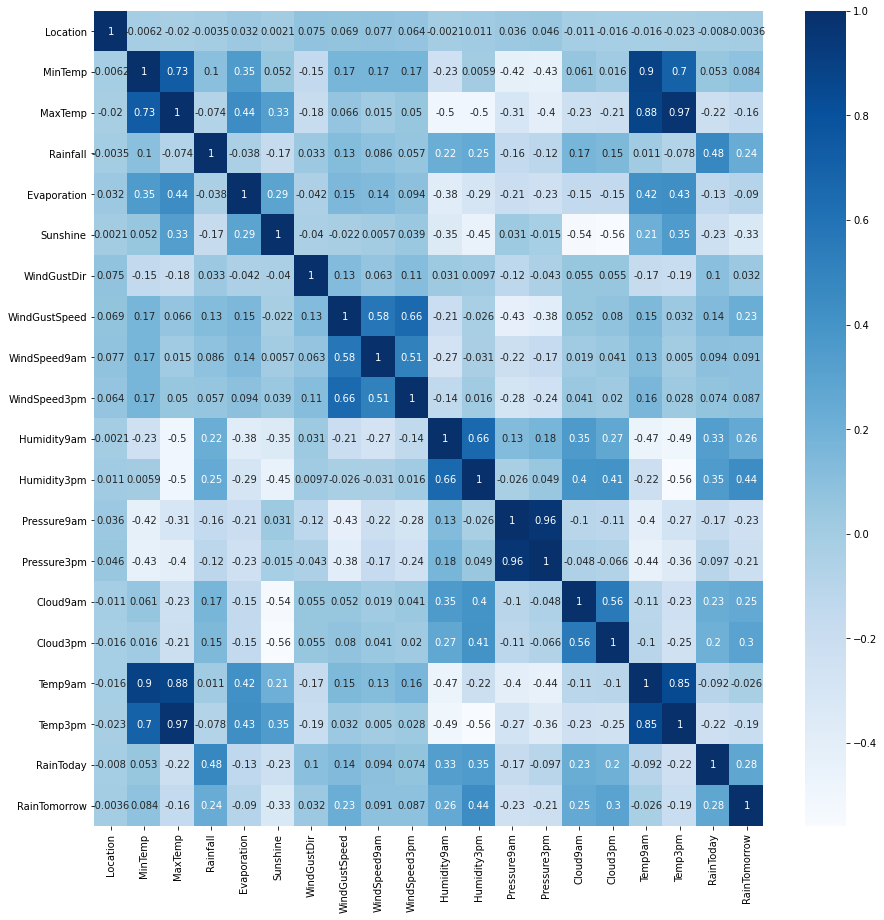

In [8]:
pylab.figure(figsize=(15,15))
cor = weather_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)

In [8]:
features_df = weather_df[['Rainfall', 'Sunshine' ,'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Cloud3pm', 'RainTomorrow']]

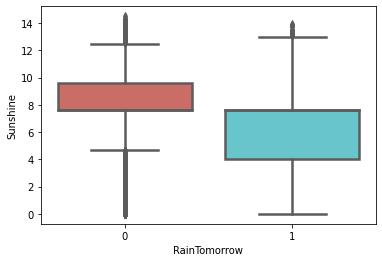

In [32]:
palette = sns.color_palette("hls", 2)
ax = sns.boxplot(x="RainTomorrow", y='Sunshine',
                 data=features_df, palette=palette, linewidth=2.5)

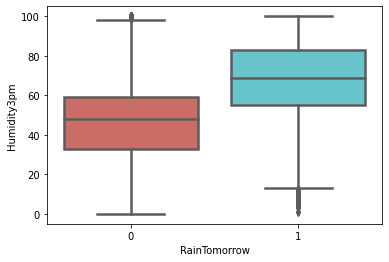

In [33]:
palette = sns.color_palette("hls", 2)
ax = sns.boxplot(x="RainTomorrow", y='Humidity3pm',
                 data=features_df, palette=palette, linewidth=2.5)

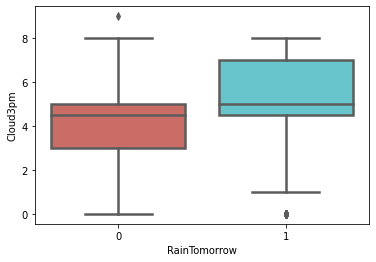

In [34]:
palette = sns.color_palette("hls", 2)
ax = sns.boxplot(x="RainTomorrow", y='Cloud3pm',
                 data=features_df, palette=palette, linewidth=2.5)

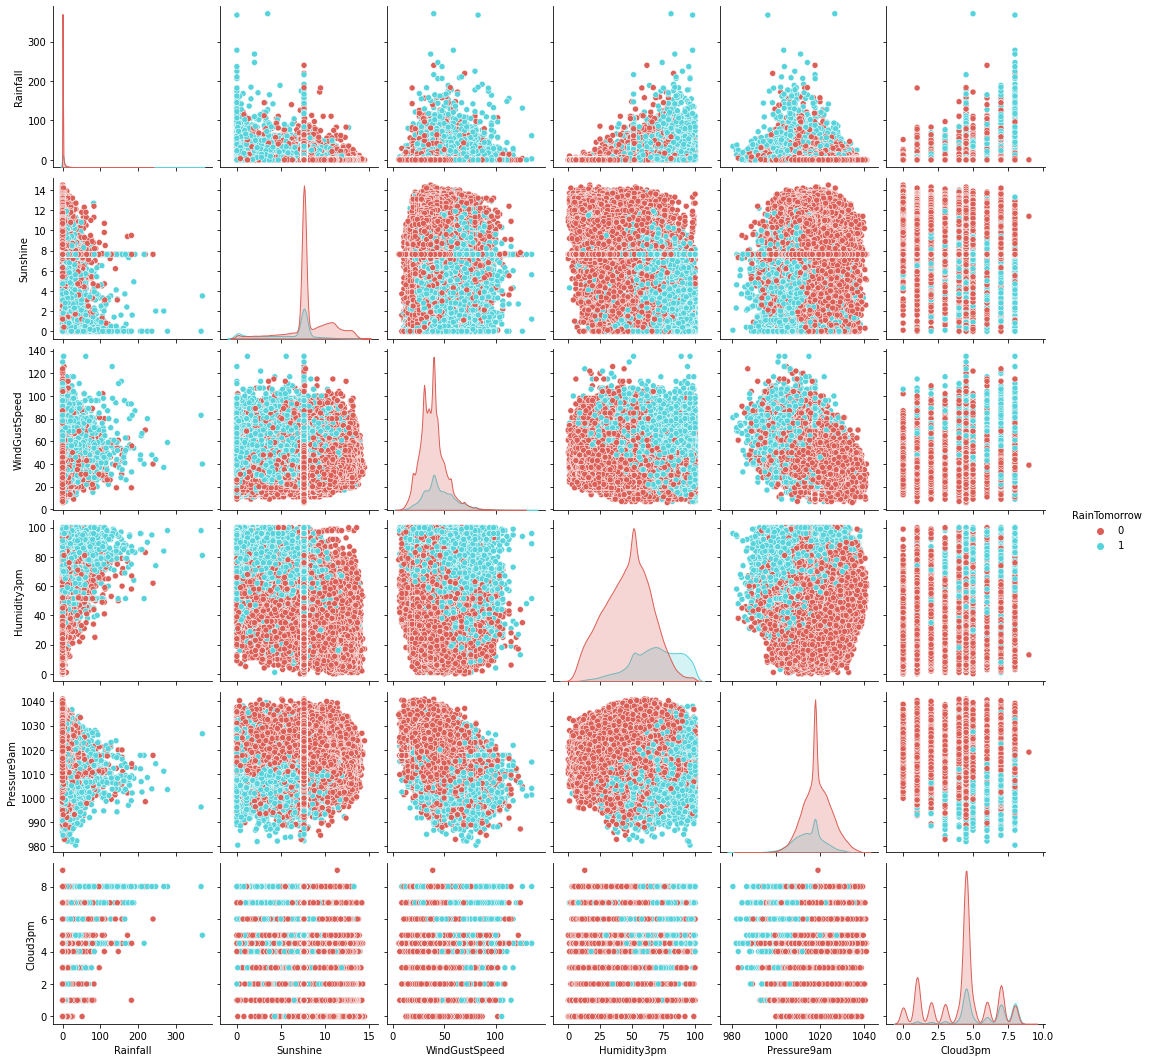

In [10]:
palette = sns.color_palette("hls", 2)
sns.pairplot(features_df, palette=palette, hue = 'RainTomorrow')

In [45]:
features = features_df.iloc[:,:-1]
labels = features_df.RainTomorrow
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.25)

In [46]:
normalizer = Normalizer()
# scaler = RobustScaler()
X_train = normalizer.fit_transform(X_train)
# X_train = scaler.fit_transform(X_train)
X_test = normalizer.fit_transform(X_test)

# models definition

## KNN

In [47]:
parameter_grid = {
            'n_neighbors': [5, 6, 7, 8],
            'weights': ['distance', 'uniform'],
            'p': [1, 2, 3]
        }

grid_searcher = GridSearchCV(KNeighborsClassifier(), parameter_grid, cv = 3, verbose=2, n_jobs=5, refit=True)
grid_searcher.fit(X_train, Y_train)
knn_model = grid_searcher.best_estimator_
 
print('Best params = ', knn_model.get_params())

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  2.8min
[Parallel(n_jobs=5)]: Done  72 out of  72 | elapsed:  6.0min finished


Best params =  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}


### KNN. Best estimator report

In [48]:
knn_preds = knn_model.predict(X_test)

print(classification_report(Y_test, knn_preds, target_names=['Yes','No']))
confusion_matrix(Y_test, knn_preds)

              precision    recall  f1-score   support

         Yes       0.85      0.95      0.90     27593
          No       0.70      0.41      0.51      7956

    accuracy                           0.83     35549
   macro avg       0.77      0.68      0.71     35549
weighted avg       0.81      0.83      0.81     35549



array([[26204,  1389],
       [ 4720,  3236]])

## Decision Tree

In [17]:
parameter_grid = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [7, 10, 15]
        }

grid_searcher = GridSearchCV(DecisionTreeClassifier(), parameter_grid, verbose=2, n_jobs=5, refit=True)
grid_searcher.fit(X_train, Y_train)
tree_model = grid_searcher.best_estimator_
 
print('Best params = ', tree_model.get_params())

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:   12.2s finished


Best params =  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


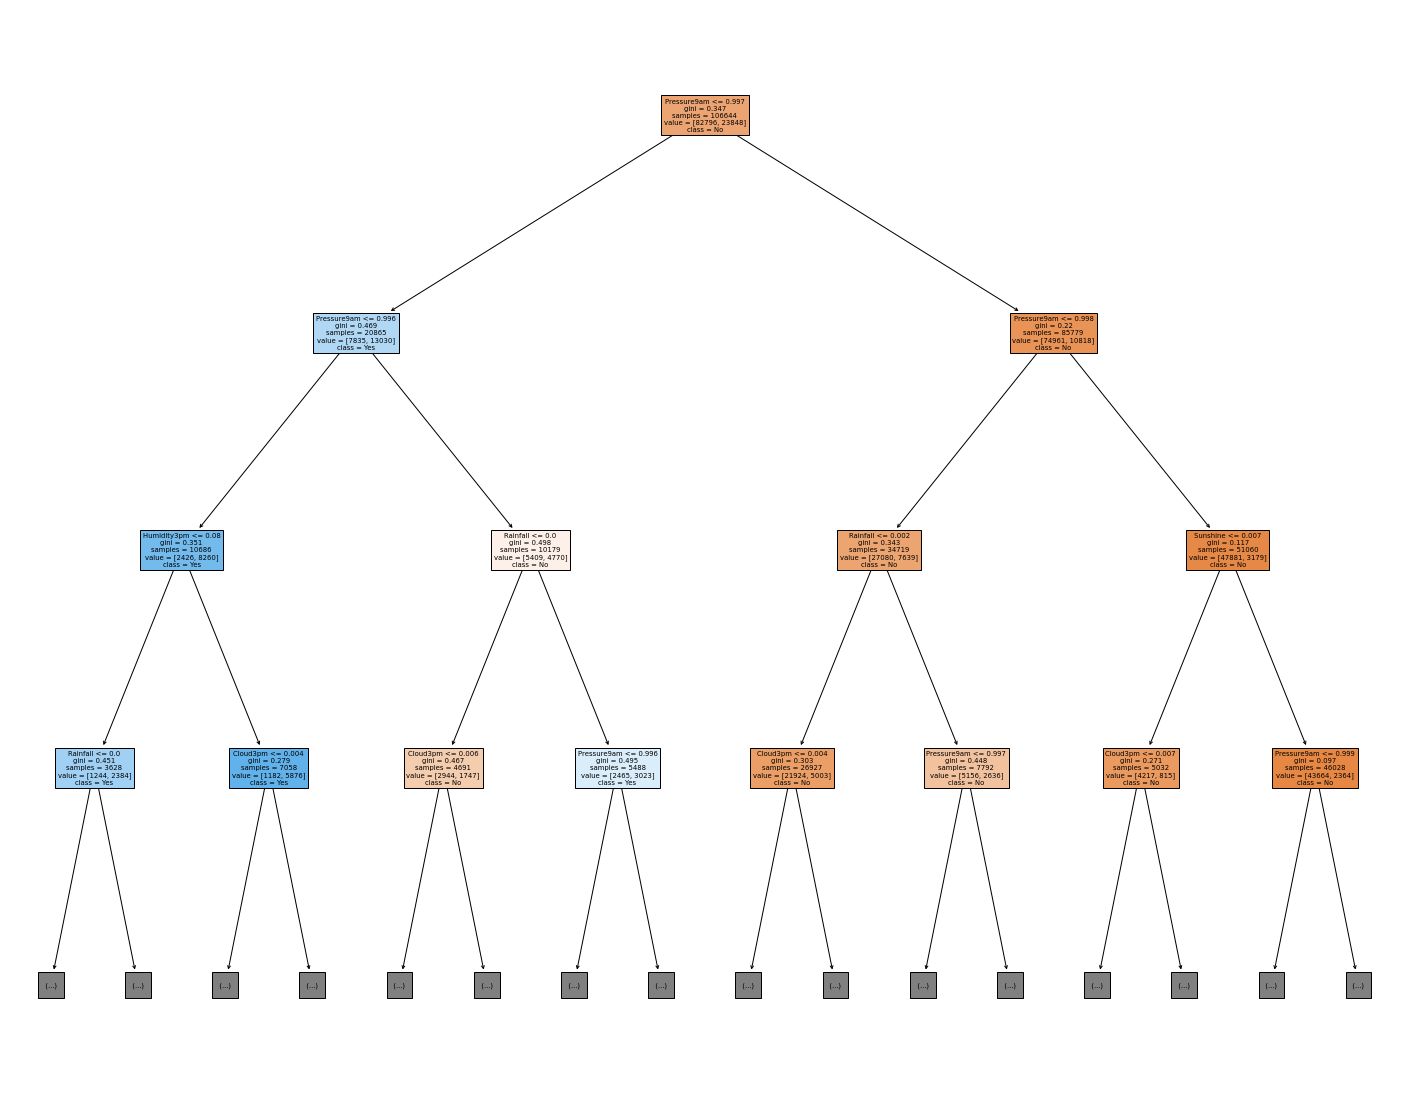

In [15]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree_model, 
              max_depth=3,
              feature_names=['Rainfall', 'Sunshine' ,'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Cloud3pm'],  
              class_names=['No', 'Yes'],
              filled=True)

### Decision Tree. Best estimator report

In [18]:
tree_preds = tree_model.predict(X_test)

print(classification_report(Y_test, tree_preds, target_names=['Yes','No']))
confusion_matrix(Y_test, tree_preds)

              precision    recall  f1-score   support

         Yes       0.85      0.95      0.90     27520
          No       0.72      0.45      0.55      8029

    accuracy                           0.84     35549
   macro avg       0.79      0.70      0.73     35549
weighted avg       0.82      0.84      0.82     35549



array([[26108,  1412],
       [ 4436,  3593]])

## SVC

In [ ]:
parameter_grid = {
            'C': [1, 1.2],
            'gamma': ['scale', 'auto', 0.001]
        }

grid_searcher = GridSearchCV(SVC(), parameter_grid, cv=3,  verbose=2, n_jobs=5, refit=True)
grid_searcher.fit(X_train, Y_train)
svc_model = grid_searcher.best_estimator_
 
print('Best params = ', svc_model.get_params())

### SVC. Best estimator report

In [ ]:
svc_preds = svc_model.predict(X_test)

print(classification_report(Y_test, svc_preds, target_names=['Yes','No']))
confusion_matrix(Y_test, svc_preds)

## Random Forest

In [20]:
parameter_grid = {
            'criterion': ['entropy', 'gini'],
            'max_depth': [10, 15, 20],
            'n_estimators': [10, 30, 50]
        }

grid_searcher = GridSearchCV(RandomForestClassifier(), parameter_grid, cv=3, verbose=2, n_jobs=5, refit=True)
grid_searcher.fit(X_train, Y_train)
forest_model = grid_searcher.best_estimator_
 
print('Best params = ', forest_model.get_params())

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done  54 out of  54 | elapsed:  2.4min finished


Best params =  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### Random Forest. Best estimator report

In [21]:
forest_preds = forest_model.predict(X_test)

print(classification_report(Y_test, forest_preds, target_names=['Yes','No']))
confusion_matrix(Y_test, forest_preds)

              precision    recall  f1-score   support

         Yes       0.86      0.95      0.90     27520
          No       0.73      0.45      0.56      8029

    accuracy                           0.84     35549
   macro avg       0.79      0.70      0.73     35549
weighted avg       0.83      0.84      0.82     35549



array([[26165,  1355],
       [ 4378,  3651]])

## Adaboost

In [43]:
parameter_grid = {
            'base_estimator': [DecisionTreeClassifier(), forest_model, tree_model],
            'n_estimators': [20, 50],
            'learning_rate': [0.05, 0.07, 0.1]
        }

grid_searcher = GridSearchCV(AdaBoostClassifier(), parameter_grid, cv=2, verbose=2, n_jobs=5, refit=True)
grid_searcher.fit(X_train, Y_train)
ab_model = grid_searcher.best_estimator_
 
print('Best params = ', forest_model.get_params())

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  36 out of  36 | elapsed: 93.6min finished


Best params =  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### Adaboost. Best estimator report

In [44]:
ab_preds = ab_model.predict(X_test)

print(classification_report(Y_test, ab_preds, target_names=['Yes','No']))
confusion_matrix(Y_test, ab_preds)

              precision    recall  f1-score   support

         Yes       0.78      1.00      0.87     27590
          No       0.00      0.00      0.00      7959

    accuracy                           0.78     35549
   macro avg       0.39      0.50      0.44     35549
weighted avg       0.60      0.78      0.68     35549



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[27590,     0],
       [ 7959,     0]])

### The best estimator:
<br><b>class:  Random Forest Classifier</b>
<br><b>params:</b>
<br>'criterion': 'gini'
<br>'max_depth': 10
<br>'n_estimators': 50
<br><b>classification_report:</b>

        precision    recall  f1-score   support

         Yes       0.86      0.95      0.90     27520
          No       0.73      0.45      0.56      8029

    accuracy                           0.84     35549
    
    
    confusion matrix:
       [26165,  1355],
       [ 4378,  3651]
    